# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

k = 1, fraction of total var explained by 1st principal component: 0.16404331279334133
k = 2, fraction of total var explained by 1st principal component: 0.16404331279334122
k = 3, fraction of total var explained by 1st principal component: 0.1640433127933418
k = 4, fraction of total var explained by 1st principal component: 0.16404331279334242
k = 5, fraction of total var explained by 1st principal component: 0.164043312793342
k = 10, fraction of total var explained by 1st principal component: 0.16404331279334267
k = 20, fraction of total var explained by 1st principal component: 0.16404331279333811
k = 30, fraction of total var explained by 1st principal component: 0.1640433127933422
k = 40, fraction of total var explained by 1st principal component: 0.16404331279334267
k = 50, fraction of total var explained by 1st principal component: 0.16404331279334258


/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


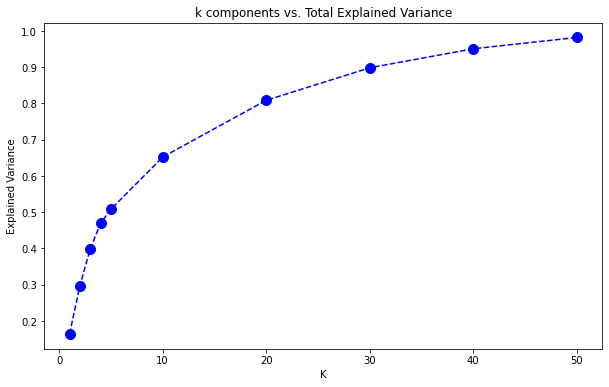

In [5]:
def P1():

### STUDENT START ###
        
    #initialize variance_ratio list
    pca_exp_var_df = []
    
    #loop over different number of principal components and append to empty list
    k_range = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] 
    for k in k_range:
        #initialize PCA class and fit the training data
        pca = PCA(n_components=k)
        principalComponents = pca.fit_transform(train_data)
        pca_exp_var_df.append(pca.explained_variance_ratio_)
    
    #plot the ratio of the total variance explained by the first component for the different values of k
    [print("k = ", k , ", fraction of total var explained by 1st principal component: ", i[0], sep = "") 
     for i, k in zip(pca_exp_var_df, k_range)]
    
    #sum over the individual ratios per k value to get the total ratio of explained varaince
    pca_exp_var_df_sum = []
    for i in pca_exp_var_df:
        if len(i) > 1:
            pca_exp_var_df_sum.append(np.sum(i , axis = 0))
        else:
            pca_exp_var_df_sum.append(i)
    
    #plot the total variance explained by the prinicpal components as a function of the number of components k
    plt.figure(figsize=(10,6))
    plt.plot(k_range, pca_exp_var_df_sum,
             color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='blue', markersize=10)
    plt.title('k components vs. Total Explained Variance')
    plt.xlabel('K')
    plt.ylabel('Explained Variance')

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

<ipython-input-6-d409bb5967c2>:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  indicesToKeep = finalDf[:,2] == target or finalDf[:,2] == int(target)


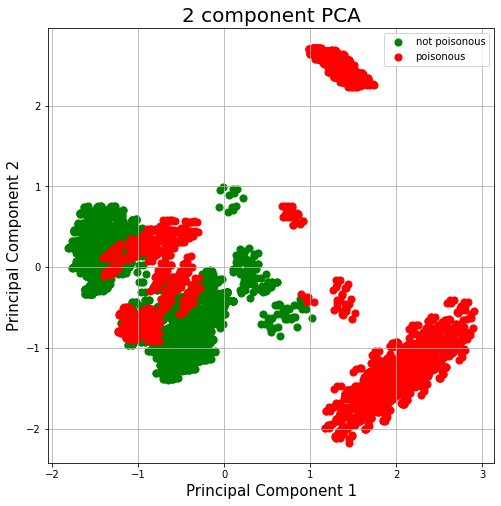

In [6]:
def P2():

### STUDENT START ###

    # Create a 2 component pca
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)
   
    # Add the labels
    finalDf = np.column_stack((principalComponents, train_labels))

    # Create the figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    # Set the target labels
    targets = ['0', '1']
    target_labels = ['not poisonous', 'poisonous']
    colors = ['g','r']

    #iterate over label types
    for target, color in zip(targets, colors):
        #filter data tow rows by label type
        indicesToKeep = finalDf[:,2] == target or finalDf[:,2] == int(target) 
        #create a square scatter plot
        ax.scatter(finalDf[indicesToKeep, 0] #appropriate rows for principal component 1
                   , finalDf[indicesToKeep, 1] #appropriate rows for principal component 2
                   , c = color
                   , s = 50)
    ax.legend(target_labels)
    ax.grid()

### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

<ipython-input-24-25befa89bb2c>:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  indicesToKeep = finalDf[:,2] == target or finalDf[:,2] == int(target)


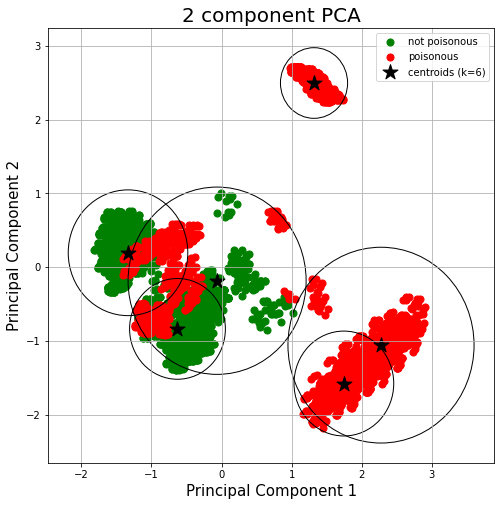

In [24]:
#LUCAS TO DO: FIX THE DIAM OF THE CIRCLES


def P3():

### STUDENT START ###
    np.set_printoptions(threshold=np.inf)

    # Create a 2 component pca from the training data
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)

    # Create a 6 cluster KMeans model
    km = KMeans(n_clusters=6)
    # Fit the clusters to the principal components and pull the unique labels
    y_km = km.fit_predict(principalComponents)
    u_labels = np.unique(y_km)

    # Add the labels and the predicted clusters
    finalDf = np.column_stack((principalComponents, train_labels, y_km))

    # Create the figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    # Set the target labels
    targets = ['0', '1']
    colors = ['g','r']

    #iterate over label types
    for target, color in zip(targets, colors):
        #filter data tow rows by label type
        indicesToKeep = finalDf[:,2] == target or finalDf[:,2] == int(target) 
        #create a square scatter plot
        ax.scatter(finalDf[indicesToKeep, 0] # plot principal component 1
                   , finalDf[indicesToKeep, 1] # plot principal component 2
                   , c = color
                   , s = 50)

    ax.grid()

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='black', edgecolor='black'
    )
    
    # create labels
    target_labels = ['not poisonous', 'poisonous', 'centroids (k=6)']
    plt.legend(target_labels)

    # draw circles around the centroids
    centers = []
    for i in range(len(km.cluster_centers_[:, 0])):
        centers.append([km.cluster_centers_[:, 0][i], 
                        km.cluster_centers_[:, 1][i]])

    #create empty lists for each cluster label
    clusters = [[],[],[],[],[],[]]
    
    #loop through label and append data from the original data frame to it    
    for i, row in enumerate(finalDf):
        for j in range(6):
            if row[3] == j:
                clusters[j].append(row[0:2])    

    #create a dataframe to append the max distance from each point to the cluster centroid
    furthest = []
    k = 6

    #loop through the clusters and plot the circles
    for i in range(k):
        temp = []
        for j in range(len(clusters[i])):
            #compute the distance between each cluster point and its centroid
            dist = ((clusters[i][j][0]-centers[i][0])**2 + (clusters[i][j][1]-centers[i][1])**2)**0.5
            temp.append(dist)
        
        #append max radius per cluster
        furthest.append(np.max(temp))
    
    #plot circle per centroid
    for i in range(k):
        circle = plt.Circle((centers[i]), furthest[i], color='k', fill = False)
        ax.add_patch(circle)

### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

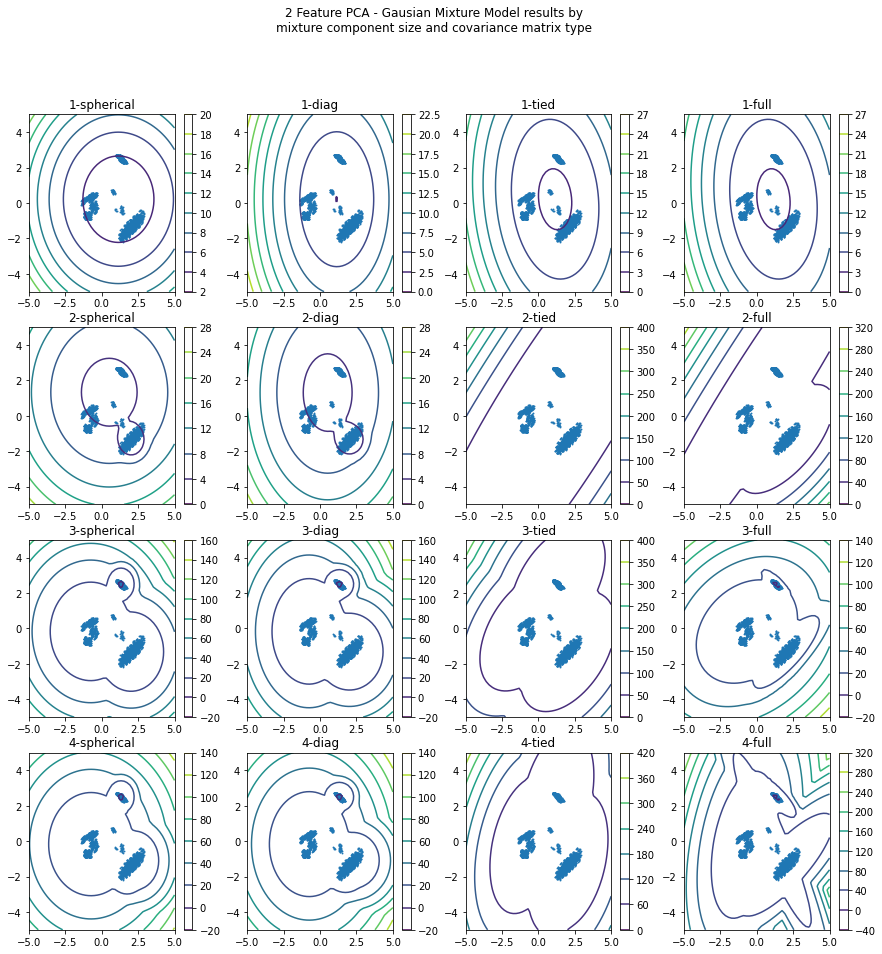

In [25]:
def P4():

### STUDENT START ###
    # Create a 2 component pca
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(train_data)
    # Add the labels
    finalDf = np.column_stack((principalComponents, train_labels))

    #Filter to postive components
    principalComponents_poisonous = finalDf[finalDf[:,2] == 1, 0:2]

    # Create the figure and 4 x 4 rows/cols for the sublplots
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

    #Create a GM for each combination n_components and covariance_type
    
    row_counter = 0 #index over rows
    for i in range(1,5):
        col_counter = 0 #index over columns
        for j in ['spherical', 'diag', 'tied', 'full']:
            #create a GM model and fit the poisonous mushrooms to it
            clf = GaussianMixture(n_components = i, covariance_type = j, random_state=12345
            ).fit(principalComponents_poisonous)

            # display predicted scores by the model as a contour plot
            #generate the 2d plane
            x = np.linspace(-5., 5.)
            y = np.linspace(-5., 5.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            
            #use the GM model to generate the height of each point in the plane
            Z = -clf.score_samples(XX.tolist())
            Z = Z.reshape(X.shape)

            #create contour lines for 3d plots
            CS = axs[row_counter, col_counter].contour(X, Y, Z)
            #add sublpot title
            axs[row_counter, col_counter].title.set_text(str(i) + "-" + j)
            #add a scatter plot showing the base data
            axs[row_counter, col_counter].scatter(principalComponents_poisonous[:, 0], 
                                                  principalComponents_poisonous[:, 1], .8)
            #add a countour line color bar to show the height
            fig.colorbar(CS, ax=axs[row_counter, col_counter])

            col_counter += 1 #step across columns for subplots
        row_counter += 1 #step across rows for subplots       

    #add figure title and plot
    fig.suptitle('2 Feature PCA - Gausian Mixture Model results by\nmixture component size and covariance matrix type')
    plt.axis('tight')
    plt.show()

### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

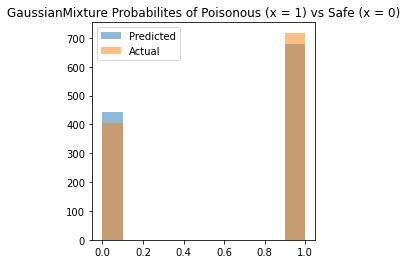

Model Accuracy:
0.9501779359430605


In [28]:
def P5():

### STUDENT START ###

    # Create a 2 component pca for the train and test data
    pca = PCA(n_components=2).fit(train_data)
    principalComponents = pca.transform(train_data)
    principalComponents_test = pca.transform(test_data)

    # Add the labels and filter to safe ad poisonous
    finalDf = np.column_stack((principalComponents, train_labels))
    principalComponents_poisonous = finalDf[finalDf[:,2] == 1, 0:2]
    principalComponents_safe = finalDf[finalDf[:,2] == 0, 0:2]

    # Create the two Gaussian Mixture models
    clf_poisinous = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=12345
                                   ).fit(principalComponents_poisonous)
    clf_safe = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=12345
                                   ).fit(principalComponents_safe)

    # Return the probability of each score
    pois_prob = np.exp(clf_poisinous.score_samples(principalComponents_test))
    safe_prob = np.exp(clf_safe.score_samples(principalComponents_test))
    predict = np.where(pois_prob > safe_prob, 1, 0)

    #  the predicted vs actual distribution
    fig = plt.figure(figsize = (4,4))
    plt.hist(predict, alpha = 0.5)
    plt.hist(test_labels, alpha = 0.5)
    plt.legend(['Predicted', 'Actual'])
    plt.title('GaussianMixture Probabilites of Poisonous (x = 1) vs Safe (x = 0)')
    plt.show()

    # Calculat the model accuracy
    print("Model Accuracy:")
    print(metrics.accuracy_score(predict, test_labels))

### STUDENT END ###

P5()

### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [29]:
def P6():

### STUDENT START ###

    #initialize empty list to score accuracy results and corresponding paramaters
    accuracy_score = []
    details = []

    #loop through 1 to 50 size pca
    for n in range(1,50):
        # Create a n size component pca
        pca = PCA(n_components=n).fit(train_data)
        principalComponents = pca.transform(train_data)
        principalComponents_test = pca.transform(test_data)


        # Add the labels and filter to safe ad poisonous
        finalDf = np.column_stack((principalComponents, train_labels))
        principalComponents_poisonous = finalDf[finalDf[:,-1] == 1, 0:n]
        principalComponents_safe = finalDf[finalDf[:,-1] == 0, 0:n]

        #loop over 20 values, logic skips over GMM models that have over 50 parameters
        for i in range(1,20):
            #loop over covariance matrix types
            for j in ['spherical', 'diag', 'tied', 'full']:
                # for spherical, diag, and full, calculate the number of parameters
                if j != "tied":
                    num_param_per_gmm_comp = n + i + 1
                    num_of_classes = 2
                    num_param = (num_param_per_gmm_comp * num_param_per_gmm_comp - 1) * num_of_classes

                else:
                    num_param = 0

                #if number of parameters > 50, don't append accuracy to list
                if num_param > 50:
                    pass

                else:
                    # Create the two Gaussian Mixture models
                    clf_poisinous = GaussianMixture(n_components = i, covariance_type = j, random_state=12345
                                                   ).fit(principalComponents_poisonous)
                    clf_safe = GaussianMixture(n_components = i, covariance_type = j, random_state=12345
                                                   ).fit(principalComponents_safe)

                    #pull out the means, weights, and covariance non-zero/non-duplicated values
                    pois_means = clf_poisinous.means_
                    safe_means = clf_safe.means_
                    pos_weights = clf_poisinous.weights_
                    safe_weights = clf_safe.means_
                    unique_cov = np.unique(np.unique(np.unique(clf_poisinous.covariances_)))
                    unique_cov_nonzero = unique_cov[unique_cov != 0]

                    #calculate the number of parameters for the "tied" covariance
                    num_param_per_class = max(len(pois_means) + len(pos_weights), 
                                              len(pois_means) + len(safe_weights)) + len(unique_cov_nonzero) 
                    num_of_classes = 2
                    num_param = (num_param_per_class - 1) * num_of_classes

                    # if the number of parameters > 50 and the covariance type = tied, skip
                    if num_param > 50 and j == "tied":
                        pass

                    else:              
                        # Return the probability of each score
                        pois_prob = np.exp(clf_poisinous.score_samples(principalComponents_test))
                        safe_prob = np.exp(clf_safe.score_samples(principalComponents_test))

                        #calculate the higher probability of each label type
                        predict = np.where(pois_prob > safe_prob, 1, 0)

                        # append the accuracy and details to the initialized lists
                        details.append([n, i, j, num_param, metrics.accuracy_score(predict, test_labels)])
                        accuracy_score.append(metrics.accuracy_score(predict, test_labels))

    #find the max accuracy                    
    indx = np.argmax(accuracy_score)

    #print the max accuracy and surrounding index values
    details_labels = ['PCA_vector_n', 'n_components', 'covariance_type', 'n_components', 'accuracy']

    print("Max accuracy at:\n")
    [print(details_labels[i], "=", details[indx][i]) for i in range(len(details_labels))]

            
### STUDENT END ###

P6()

Max accuracy at:

PCA_vector_n = 5
n_components = 3
covariance_type = tied
n_components = 48
accuracy = 0.9759786476868327
